# Embeddings Analysis

See: 
- https://huggingface.co/allenai/specter2
- https://github.com/allenai/specter

Potentially interesting paper: https://www.frontiersin.org/articles/10.3389/fdata.2022.1045513/full

In [2]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
import json

with open("../data/121_results_v2_specter.json", "r") as file:
    data = json.load(file)

In [17]:
# Extract embedding vectors
vectors = []
for _, details in data.items():
    if 'message' in details:
        continue
    if details is None:
        continue
    if 'embedding' in details: 
        if details['embedding'] and 'vector' in details['embedding']:
            if details['embedding']['vector']:
                vectors.append(details['embedding']['vector'])


In [18]:
# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

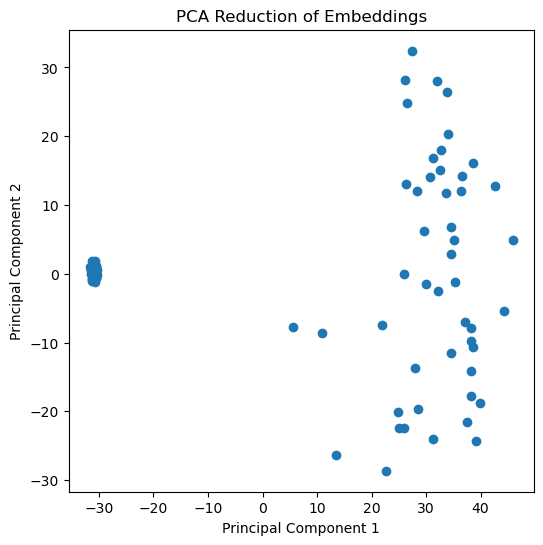

In [20]:
plt.figure(figsize=(6,6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])

plt.title('PCA Reduction of Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()